```
X subscript is k, x subscript is n

Forward transform:
X_k = sum(n = 0 to N-1) e^-i{arg} * x_n
  arg = (2pi/N)*n*k

Inverse transform:
x_n = (1/N) x sum(k = 0 to N-1) e^+i{arg}
  arg = (2pi/N)*n*k
```

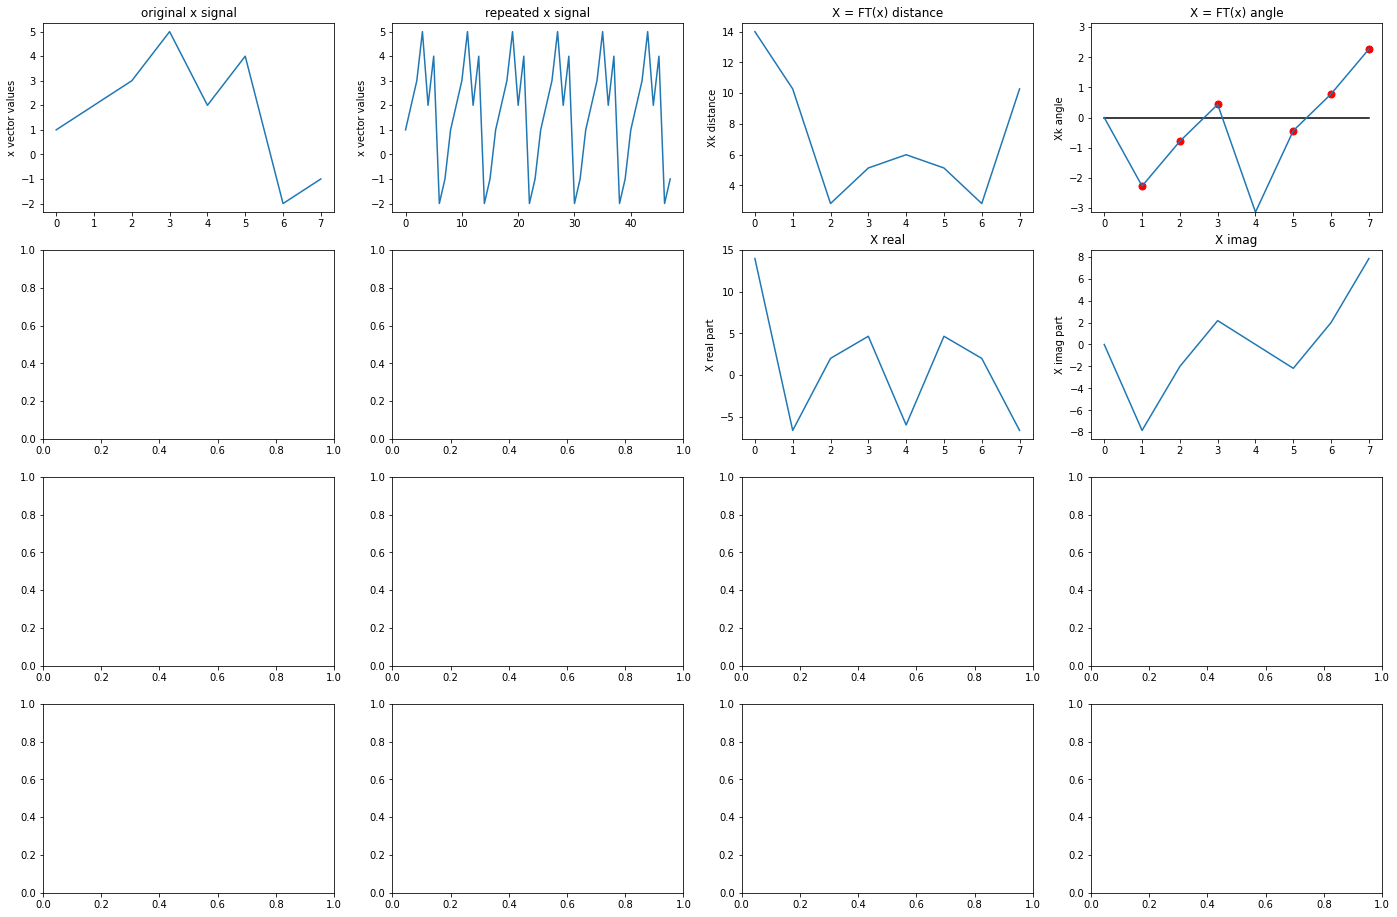

In [40]:
from matplotlib import pyplot as plt
from math import pi, sin, cos, sqrt, atan2

fig,axs=plt.subplots(4, 4, figsize=(24, 16))

x = [1, 2, 3, 5, 2, 4, -2, -1]

def ForwardDFT(x):
    N = len(x)
    Xr, Xi, Xd, Xa = [], [], [], []
    for k in range(N):
        Xreal, Ximag = 0., 0.
        for n in range(N):
            arg = (2*pi/N)*k*n
            Xreal += cos(arg)*x[n]
            Ximag -= sin(arg)*x[n]
        Xr.append(Xreal)
        Xi.append(Ximag)
        Xd.append(sqrt(Xreal*Xreal + Ximag*Ximag))
        phase = atan2(Ximag, Xreal)
        if phase > pi:  phase -= 2*pi
        if phase < -pi: phase += 2*pi
        Xa.append(phase)
    return Xr, Xi, Xd, Xa, N


Xr, Xi, Xd, Xa, N = ForwardDFT(x)

x_rep = x + x + x + x + x + x

pc, pcx = [], []
for i in range((N-1)//2):
    pc.append(Xa[(i+1)])
    pc.append(Xa[N-(i+1)])
    pcx.append(i+1)
    pcx.append(N-(i+1))
axs[0][3].scatter(pcx, pc, s=49, color='red')
axs[0][3].plot([0, N-1], [0, 0], color='k')
    
axs[0][0].plot(x)
axs[0][1].plot(x_rep)
axs[0][2].plot(Xd)
axs[0][3].plot(Xa)
axs[1][2].plot(Xr)
axs[1][3].plot(Xi)

axs[0][0].set(ylabel = 'x vector values', title='original x signal')
axs[0][1].set(ylabel = 'x vector values', title='repeated x signal')
axs[0][2].set(ylabel = 'Xk distance', title='X = FT(x) distance')
axs[0][3].set(ylabel = 'Xk angle',    title='X = FT(x) angle', ylim=(-pi, pi))
axs[1][2].set(ylabel = 'X real part', title='X real')
axs[1][3].set(ylabel = 'X imag part', title='X imag')

plt.show()

# axs[2][1].plot([-3,-2,-1,0,1],[10,-3,27,-12,5], color='red', marker='v', ms=9)
# axs[2][2].plot([6,5.1,3.9,3.1,1.8,1.2,0.1,-1,-6, -3, -4], color='black', linewidth=4)